# Train a model to categorize cats and dogs
download the zip file from https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

In [1]:
!pip install tensorflow==2.0.0-beta0

  Using cached https://files.pythonhosted.org/packages/cf/a2/b754273c8d9650011712cd5542d179feccfb69ceb492d23f61ab190bada4/tensorflow-2.0.0b0-cp37-cp37m-macosx_10_11_x86_64.whl
    100% |████████████████████████████████| 583kB 551kB/s ta 0:00:01
  Found existing installation: wrapt 1.10.11
Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd

In [3]:
!ls

MSR-LA - 3467.docx           readme[1].txt
Packt_3_5_Cats_vs_Dogs.ipynb test_filenames.csv
PetImages                    train_filenames.csv


In [4]:
LIST_OF_LABELS = "cat,dog".split(',')
HEIGHT = 300
WIDTH = 300
NUM_CHANNELS = 3
NCLASSES = len(LIST_OF_LABELS)
BATCH_SIZE = 32

In [5]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

## Create the CVS containing the file names

In [6]:
train_file_list, train_category_list, test_file_list, test_category_list = [], [], [], []

In [7]:
for i in range(11000, 12500):
    cat = './PetImages/Cat/{}.jpg'.format(i)
    dog = './PetImages/Dog/{}.jpg'.format(i)
    test_file_list.append(cat)
    test_category_list.append(0)
    test_file_list.append(dog)
    test_category_list.append(1)
test_file_df = pd.DataFrame({'filename': test_file_list, 'class': test_category_list})

In [8]:
test_file_df.head()

,filename,class
0,./PetImages/Cat/11000.jpg,0
1,./PetImages/Dog/11000.jpg,1
2,./PetImages/Cat/11001.jpg,0
3,./PetImages/Dog/11001.jpg,1
4,./PetImages/Cat/11002.jpg,0


In [9]:
test_file_df.tail()

,filename,class
2995,./PetImages/Dog/12497.jpg,1
2996,./PetImages/Cat/12498.jpg,0
2997,./PetImages/Dog/12498.jpg,1
2998,./PetImages/Cat/12499.jpg,0
2999,./PetImages/Dog/12499.jpg,1


In [10]:
#test_file_df.to_csv('./test_filenames.csv', header=None, index=False)

In [11]:
#set this to 11000 to work with all the data
for i in range(20):
    cat = './PetImages/Cat/{}.jpg'.format(i)
    dog = './PetImages/Dog/{}.jpg'.format(i)
    train_file_list.append(cat)
    train_category_list.append(0)
    train_file_list.append(dog)
    train_category_list.append(1)
train_file_df = pd.DataFrame({'filename': train_file_list, 'class': train_category_list})

In [12]:
train_file_df.head()

,filename,class
0,./PetImages/Cat/0.jpg,0
1,./PetImages/Dog/0.jpg,1
2,./PetImages/Cat/1.jpg,0
3,./PetImages/Dog/1.jpg,1
4,./PetImages/Cat/2.jpg,0


In [13]:
train_file_df.tail()

,filename,class
35,./PetImages/Dog/17.jpg,1
36,./PetImages/Cat/18.jpg,0
37,./PetImages/Dog/18.jpg,1
38,./PetImages/Cat/19.jpg,0
39,./PetImages/Dog/19.jpg,1


In [14]:
#train_file_df.to_csv('./train_filenames.csv', header=None, index=False)

## test that we can read a file

In [15]:
img = tf.io.read_file(test_file_df['filename'][0])

In [16]:
print(img)

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01L\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x00\x06\x07\xff\xc4\x00=\x10\x00\x01\x04\x01\x03\x02\x04\x03\x06\x06\x01\x03\x04\x03\x01\x00\x01\x00\x02\x03\x11!\x04\x121AQ\x05\x13"aq\x81\x91\x06\x142\xa1\xb1\xc1#BR\xd1\xe1\xf0b\x153\xf1$Cr\x92\x074\x82\x16\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\xff\xc4\x00\x1f\x11\x01\x01\x01\x01\x00\x03\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x01\x11\x02\x12!1\x03AQ\x13a\xff\xda\x00\x0c\x03\

In [17]:
img = tf.image.decode_jpeg(img, channels=3)

In [18]:
print(img)

tf.Tensor(
[[[135 115  80]
  [137 117  82]
  [138 118  83]
  ...
  [136 106  70]
  [134 104  68]
  [134 104  68]]

 [[135 115  80]
  [137 117  82]
  [138 118  83]
  ...
  [138 108  72]
  [136 106  70]
  [135 105  69]]

 [[135 115  80]
  [137 117  82]
  [138 118  83]
  ...
  [139 109  73]
  [137 107  71]
  [136 106  70]]

 ...

 [[ 72  72  64]
  [ 70  70  62]
  [ 70  70  62]
  ...
  [161 147 112]
  [161 147 112]
  [161 147 112]]

 [[ 68  67  62]
  [ 67  66  61]
  [ 66  65  60]
  ...
  [161 147 112]
  [161 147 112]
  [161 147 112]]

 [[ 65  64  59]
  [ 64  63  58]
  [ 63  62  57]
  ...
  [161 147 112]
  [161 147 112]
  [161 147 112]]], shape=(332, 500, 3), dtype=uint8)


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

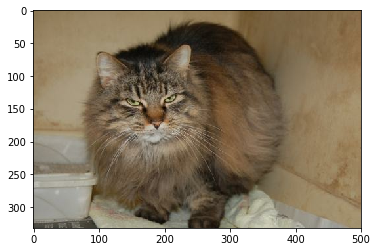

In [20]:
plt.imshow(img)

## Functions to read in data

In [21]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=NUM_CHANNELS)
  image = tf.image.resize(image, [HEIGHT, WIDTH])
  image /= 255.0  # normalize to [0,1] range

  return image

def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

In [22]:
path_ds = tf.data.Dataset.from_tensor_slices(train_file_list)

In [23]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [24]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(train_category_list, tf.int64))

In [25]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [26]:
ds = image_label_ds.shuffle(buffer_size=1000 * BATCH_SIZE)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>

## Build our model

In [27]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, NUM_CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

## Compile

In [28]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train

In [29]:
cnn_model.fit(ds, epochs=2, steps_per_epoch=20)

Epoch 1/2
20/20 [==============================] - 30s 2s/step - loss: 1.5985 - accuracy: 0.6422
Epoch 2/2
20/20 [==============================] - 28s 1s/step - loss: 0.0396 - accuracy: 0.9906
